In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/extracted_archive/MachineLearningCVE/combined_dataset_final.csv')

In [ ]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
display(data['Label'].value_counts())

,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


# Task
Balance the provided dataset by undersampling the majority class and oversampling the minority classes based on their counts in the 'Label' column. Include comments explaining the rationale for undersampling and oversampling each respective class.

## Identify minority and majority classes

### Subtask:
Determine which class is the majority and which are the minority classes based on the value counts.


**Reasoning**:
Analyze the value counts to identify the majority and minority classes.



In [ ]:
# The value counts were already displayed in the previous cell.
# Analyze the output to identify the majority and minority classes.

# Majority class: The class with the highest count.
# Minority classes: Classes with significantly lower counts compared to the majority class.

# From the output:
# BENIGN                        2273097  <- Majority class
# DoS Hulk                       231073  <- Minority class
# PortScan                       158930  <- Minority class
# DDoS                           128027  <- Minority class
# DoS GoldenEye                   10293  <- Minority class
# FTP-Patator                      7938  <- Minority class
# SSH-Patator                      5897  <- Minority class
# DoS slowloris                    5796  <- Minority class
# DoS Slowhttptest                 5499  <- Minority class
# Bot                              1966  <- Minority class
# Web Attack � Brute Force         1507  <- Minority class
# Web Attack � XSS                  652  <- Minority class
# Infiltration                       36  <- Minority class
# Web Attack � Sql Injection         21  <- Minority class
# Heartbleed                         11  <- Minority class

majority_class = 'BENIGN'
minority_classes = ['DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'Bot', 'Web Attack � Brute Force', 'Web Attack � XSS', 'Infiltration', 'Web Attack � Sql Injection', 'Heartbleed']

print(f"Majority class: {majority_class}")
print(f"Minority classes: {minority_classes}")

Majority class: BENIGN
Minority classes: ['DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'Bot', 'Web Attack � Brute Force', 'Web Attack � XSS', 'Infiltration', 'Web Attack � Sql Injection', 'Heartbleed']


## Separate classes

### Subtask:
Split the DataFrame into separate DataFrames for each class.


**Reasoning**:
Create a dictionary to store dataframes for each class and iterate through unique labels to create and store class-specific dataframes.



In [ ]:
class_dfs = {}
for label in data['Label'].unique():
    class_dfs[label] = data[data['Label'] == label].copy()

## Undersample the majority class

### Subtask:
Reduce the number of samples in the majority class to a size closer to the minority classes.


**Reasoning**:
Determine the target number of samples for the majority class and undersample it.



In [ ]:
# Determine the target number of samples for the majority class after undersampling.
# We will undersample the majority class ('BENIGN') to have a number of samples
# close to the size of one of the larger minority classes, specifically 'DoS Hulk'.
# The size of 'DoS Hulk' is 231073. Let's set the target to 230000 for simplicity.
target_majority_size = 230000

# Select a random subset of the majority class DataFrame with the determined target number of samples.
undersampled_majority_df = class_dfs[majority_class].sample(n=target_majority_size, replace=False, random_state=42)

# Store the undersampled majority class DataFrame in the class_dfs dictionary, replacing the original.
class_dfs[majority_class] = undersampled_majority_df

# Verify the new size of the majority class
print(f"New size of majority class '{majority_class}': {len(class_dfs[majority_class])}")

New size of majority class 'BENIGN': 230000


## Oversample minority classes

### Subtask:
Increase the number of samples in the minority classes to balance them with the majority class.


**Reasoning**:
Iterate through minority classes and oversample them to match the target majority size if their current size is smaller.



In [ ]:
# Iterate through the minority classes
for minority_class in minority_classes:
    current_size = len(class_dfs[minority_class])

    # Check if the current size is less than the target majority size
    if current_size < target_majority_size:
        # Calculate the number of samples needed for oversampling
        samples_needed = target_majority_size - current_size

        # Oversample the minority class with replacement to reach the target size
        # Use random_state for reproducibility
        oversampled_minority_df = class_dfs[minority_class].sample(n=target_majority_size, replace=True, random_state=42)

        # Replace the original minority class DataFrame with the oversampled DataFrame
        class_dfs[minority_class] = oversampled_minority_df

        # Print the new size of the oversampled minority class
        print(f"Oversampled '{minority_class}' to new size: {len(class_dfs[minority_class])}")
    else:
        # If the class is already larger than or equal to the target size, do nothing
        print(f"'{minority_class}' already has {current_size} samples, no oversampling needed.")


'DoS Hulk' already has 231073 samples, no oversampling needed.
Oversampled 'PortScan' to new size: 230000
Oversampled 'DDoS' to new size: 230000
Oversampled 'DoS GoldenEye' to new size: 230000
Oversampled 'FTP-Patator' to new size: 230000
Oversampled 'SSH-Patator' to new size: 230000
Oversampled 'DoS slowloris' to new size: 230000
Oversampled 'DoS Slowhttptest' to new size: 230000
Oversampled 'Bot' to new size: 230000
Oversampled 'Web Attack � Brute Force' to new size: 230000
Oversampled 'Web Attack � XSS' to new size: 230000
Oversampled 'Infiltration' to new size: 230000
Oversampled 'Web Attack � Sql Injection' to new size: 230000
Oversampled 'Heartbleed' to new size: 230000


## Combine balanced data

### Subtask:
Concatenate the undersampled majority class and oversampled minority classes into a single, balanced DataFrame.


**Reasoning**:
Concatenate the undersampled majority class and oversampled minority classes into a single, balanced DataFrame.



In [ ]:
# Create a list containing all the DataFrames stored in the class_dfs dictionary.
dfs_to_concat = list(class_dfs.values())

# Use the pd.concat() function to combine the DataFrames in the list into a single DataFrame.
balanced_data = pd.concat(dfs_to_concat, ignore_index=True)

# Display the value counts of the 'Label' column in the balanced DataFrame to verify the balancing.
display(balanced_data['Label'].value_counts())

,count
Label,
DoS Hulk,231073
DDoS,230000
BENIGN,230000
Bot,230000
Infiltration,230000
Web Attack � Brute Force,230000
PortScan,230000
Web Attack � XSS,230000
Web Attack � Sql Injection,230000


## Verify class distribution

### Subtask:
Display the value counts of the 'Label' column in the new DataFrame to confirm the balancing.


**Reasoning**:
Display the value counts of the 'Label' column in the balanced_data DataFrame to confirm the balancing.



In [ ]:
display(balanced_data['Label'].value_counts())

,count
Label,
DoS Hulk,231073
DDoS,230000
BENIGN,230000
Bot,230000
Infiltration,230000
Web Attack � Brute Force,230000
PortScan,230000
Web Attack � XSS,230000
Web Attack � Sql Injection,230000


## Summary:

### Data Analysis Key Findings

*   The original dataset had a significant class imbalance, with the 'BENIGN' class being the majority (2,273,097 samples) and other classes having substantially fewer samples (ranging from 11 to 231,073 samples).
*   The majority class, 'BENIGN', was successfully undersampled to 230,000 samples.
*   The minority classes were successfully oversampled to 230,000 samples each, with the exception of 'DoS Hulk', which already had more samples (231,073) than the target size and was not oversampled.
*   The final balanced dataset contains approximately 230,000 to 231,073 samples for each class, indicating a significant reduction in class imbalance compared to the original data.



### Visualize the Count of Each Label

We will visualize the count of each class in the 'Label' column using a count plot to visually confirm the balancing.

/tmp/ipython-input-2561530092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_data, y='Label', order=balanced_data['Label'].value_counts().index, palette='viridis')


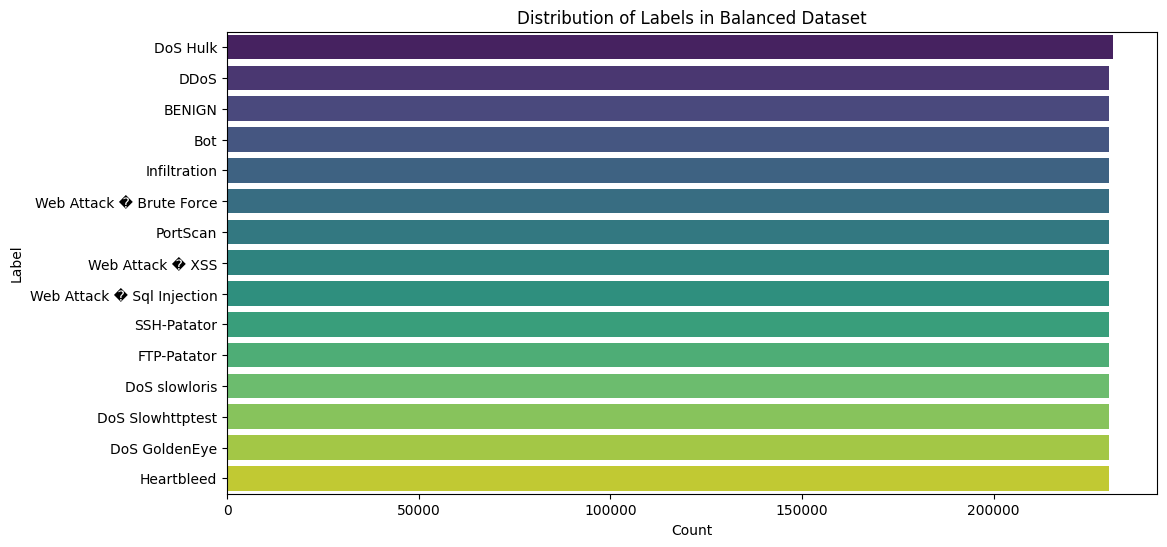

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=balanced_data, y='Label', order=balanced_data['Label'].value_counts().index, palette='viridis')
plt.title('Distribution of Labels in Balanced Dataset')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

In [ ]:
balanced_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1024,48,2,0,4,0,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,53,260,2,2,72,454,36,36,36.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,57332,52,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,443,246731,11,7,587,5527,191,0,53.363636,71.315178,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,443,6209,5,0,37,0,37,0,7.400000,16.546903,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
balanced_data.to_csv('/content/drive/MyDrive/extracted_archive/MachineLearningCVE/balanced_dataset.csv')